In [105]:
#Importacion de Paquetes 
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import keras 
#Exportacion desde las librerias 
################## KERAS #######################
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.models import load_model
from keras.models import Model

################# SKLEARN ######################
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

################# TENSORFLOW y MLXTEND #########
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mlxtend.plotting import plot_confusion_matrix

In [106]:
#Definicion de Variables de programa 
#Path de las imagenes C:\Users\ESPOIR\Documents\Proyecto_Final_Tr_Datos
path = 'C:/Users/ESPOIR/Documents/PROYECTO_FINAL/Carnes'
#Definicion de ruta de imagenes para entrenamiento 
path_train = path + '/train'
#Definicion de ruta de imagenes para test o validación 
path_test = path + '/test'
#print(path_test)
################################################################
# Variables Globales
epocas = 60
carga = 100
pixeles_ancho = 300
pixeles_alto  = 300


In [107]:
#Obtencion de los datos y definición 
#path_train la ruta de las imagenes
#validation_split=fraccion de datos a reservar para validar
#subset = subconjuntos de datos a devolver (validacion/entrenamiento/ambos)
#seed = semilla aleatoria para barajar y transformaciones
#image_size = tamaño de imagen (alto, ancho) 
train_ds = tf.keras.utils.image_dataset_from_directory(path_train, validation_split = 0.3, 
                                                       subset = "training", seed = 123, 
                                                       image_size = [pixeles_alto,pixeles_ancho])
#etiquetas de las clases en las subcarpeta de train
class_names = train_ds.class_names
print(class_names)

Found 1634 files belonging to 8 classes.
Using 1144 files for training.
['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


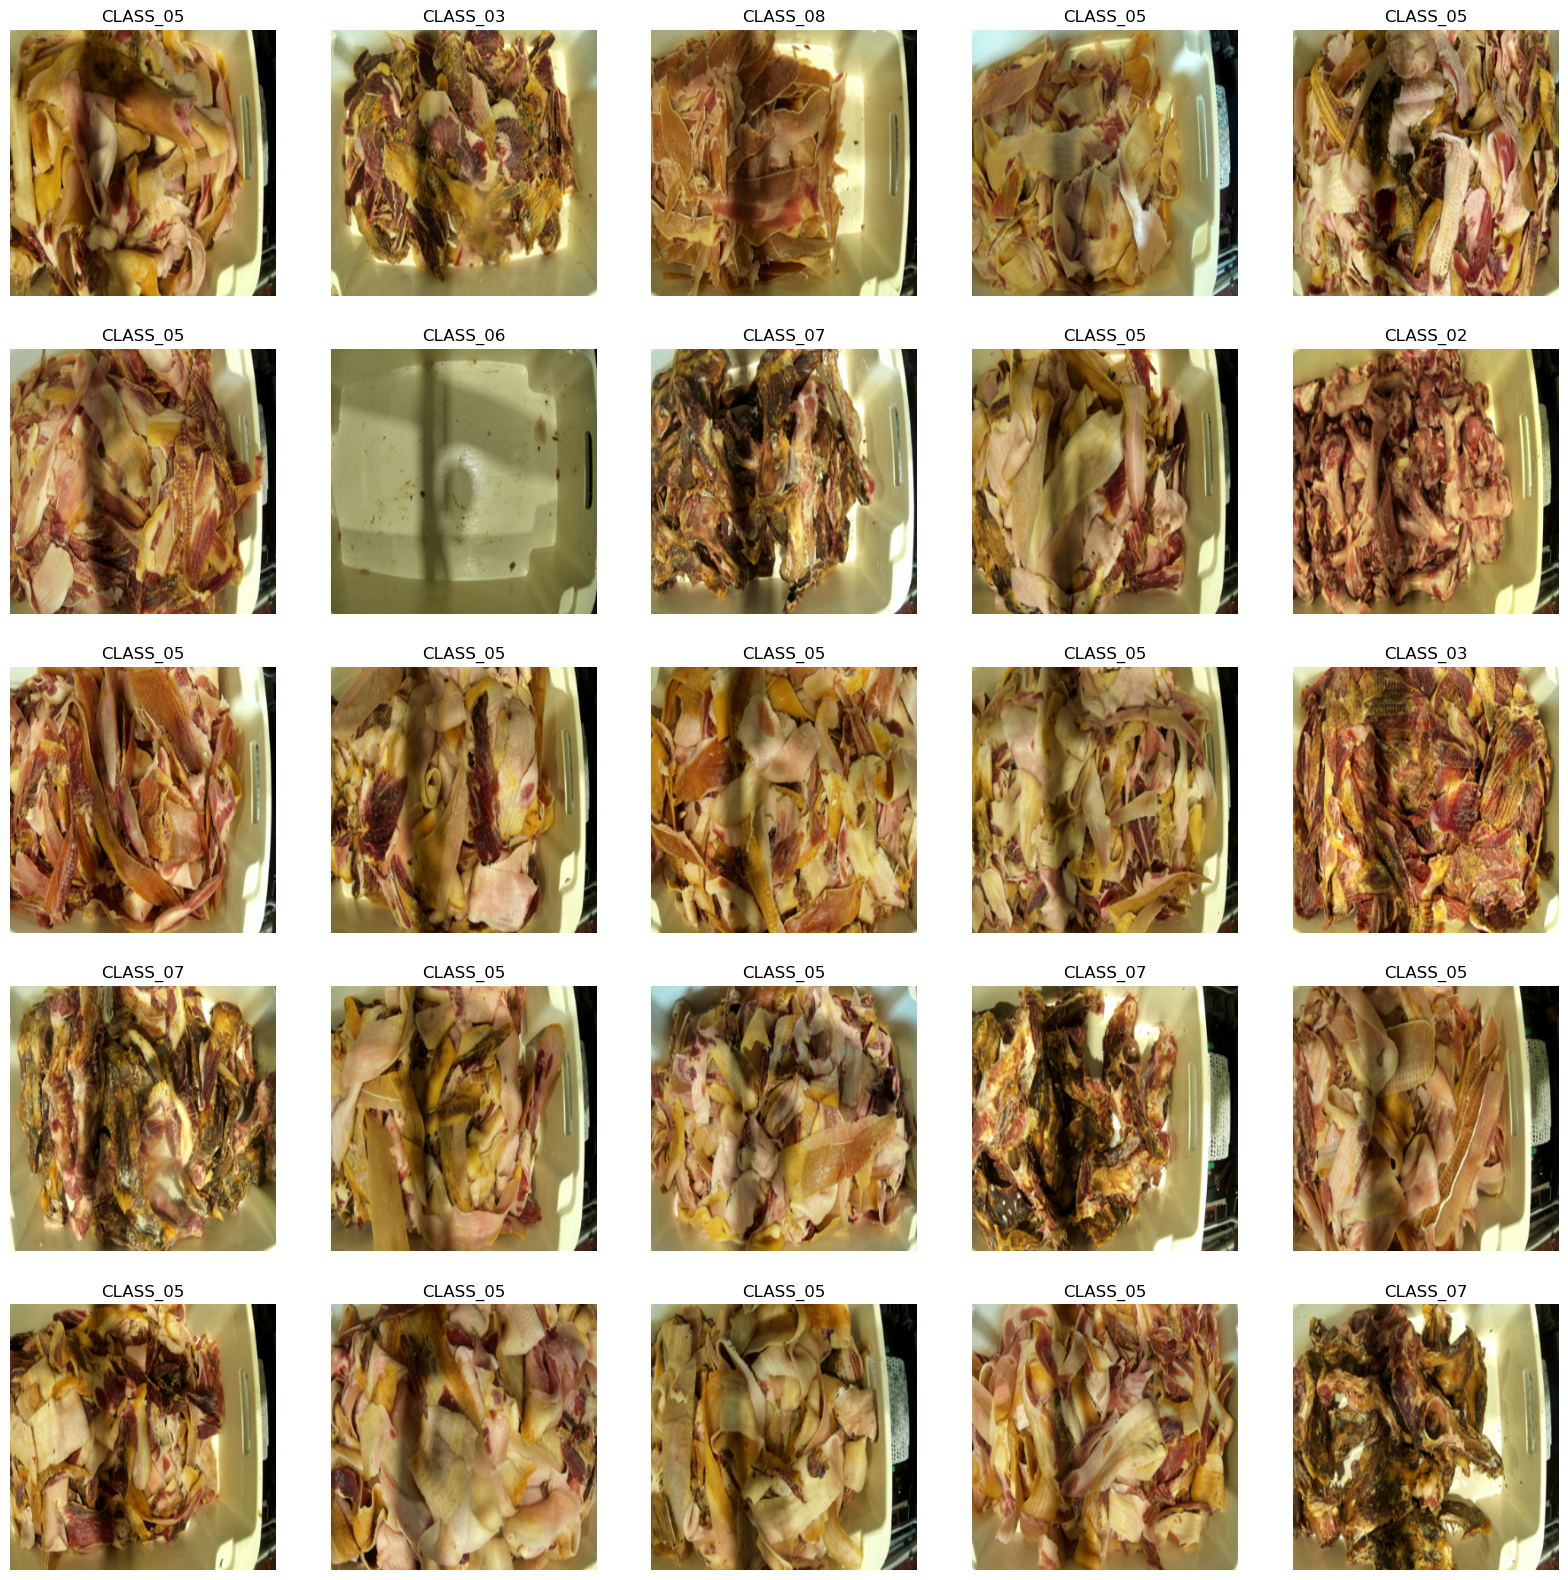

In [108]:
################### GRAFICAR IMAGENES Y DEFINICIONES #############################
#Se define el tamaño por imagen para ser vizualizada
plt.figure(figsize=[20,20])

#Se recorre el arreglo para poder visualizar imagenes de las diferentes clases 
for images, labels in train_ds.take(1):
    #vamos a obtener para la grafica un rango de 25
    for i in range(25):
        #definimos que se dibuje en un plot de 5x5
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [109]:
##########################################################################################################################
#Se definen las epocas para el aprendizaje del modelo 
num_classes = len(class_names)

modelo_imagenes = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(pixeles_alto, pixeles_ancho, 3)),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)   
])
print("#################################################################################################################")
print("El modelo se ha generado")
print("#################################################################################################################")

#################################################################################################################
El modelo se ha generado
#################################################################################################################


In [110]:
#########################################################################################################################
#Compilación
modelo_imagenes.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    #loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print("#################################################################################################################")
print("model.compile")
print("#################################################################################################################")
##########################################################################################################################
print("Impresion de Summary")
#model.summary()

#################################################################################################################
model.compile
#################################################################################################################
Impresion de Summary


In [111]:
######################### MODELO FIT ##########################################################
modelo_clasificador = modelo_imagenes.fit(train_ds,epochs=epocas, batch_size=carga)
print("Modelo Entrenado")
print("#################################################################################################################")

Epoch 1/60
36/36 [==============================] - 26s 704ms/step - loss: 3.1077 - accuracy: 0.5490
Epoch 2/60
36/36 [==============================] - 26s 727ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 3/60
36/36 [==============================] - 26s 731ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 4/60
36/36 [==============================] - 27s 731ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 5/60
36/36 [==============================] - 27s 759ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 6/60
36/36 [==============================] - 27s 743ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 7/60
36/36 [==============================] - 27s 749ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 8/60
36/36 [==============================] - 28s 760ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 9/60
36/36 [==============================] - 27s 752ms/step - loss: 2.8798 - accuracy: 0.5664
Epoch 10/60
36/36 [==============================] - 28s 784ms/step - loss: 2.8798 - accura

In [112]:
#######################################################################################################################
print("test_ds, train_eval, test_val")
#test_ds 
#path_test ruta de las imagenes de entrenamiento
#seed = semilla aleatoria para barajar y transformaciones
#image_size = tamaño de imagen (alto, ancho) 
test_ds = tf.keras.utils.image_dataset_from_directory(path_test, 
                                                      seed = 123, 
                                                      image_size= [pixeles_alto,pixeles_ancho]
                                                     )
#modelo_clasificador.evaluate recibe dos parametros train_ds o test_ds y verbose (valor 0=silencio, 
#1=barra progreso, 2=linea unica)
evaluacion_train = modelo_imagenes.evaluate(train_ds, verbose=1)
evaluacion_test = modelo_imagenes.evaluate(test_ds, verbose=1)
porcentaje_test = evaluacion_test[1]*100
porcentaje_train = evaluacion_train[1]*100
print("\n")
print("Porcentaje Test =  %", round(porcentaje_test,2))
print("\n")
print("Porcentaje Train =  %", round(porcentaje_train,2))


test_ds, train_eval, test_val
Found 810 files belonging to 8 classes.
26/26 [==============================] - 5s 197ms/step - loss: 3.2767 - accuracy: 0.5667


Porcentaje Test =  % 56.67


Porcentaje Train =  % 56.64


In [113]:
###########################################################################################################################
#grabamos el modelo aprendido para trabajarlo
modelo_imagenes.save("mimodelo2.h5py")
print("#################################################################################################################")
print("Modelo Guardado")
print("#################################################################################################################")
############################################################################################################################


INFO:tensorflow:Assets written to: mimodelo2.h5py\assets


INFO:tensorflow:Assets written to: mimodelo2.h5py\assets


#################################################################################################################
Modelo Guardado
#################################################################################################################


In [114]:
######AQUI
print("#################################################################################################################")
#test_data_dir = path_test
#train_data_dir = path_train

custom_model= load_model("./mimodelo2.h5py")
#custom_model.summary()

print("El modelo se ha cargado con exito")
print("#################################################################################################################")


#################################################################################################################
El modelo se ha cargado con exito
#################################################################################################################


In [115]:
#############################################################################################################################
#path_test o path_train = ruta del directorio
#target_size = las dimensiones a las que se redimencionan las imagenes encontradas
#class_model puede ser de tipo (categorico, binario, escaso, entrada o ninguno). El valor predefinido es categorico 
#shuffle=False ordena los datos de manera alfanumerica
#generacion de predicciones del modelo, generacion de predicciones de salida para los datoss de entrada

generador_test = ImageDataGenerator().flow_from_directory(
    path_test, 
    target_size= (pixeles_alto, pixeles_ancho), 
    class_mode='categorical', 
    shuffle=False
)
generador_train = ImageDataGenerator().flow_from_directory(
    path_train, 
    target_size= (pixeles_alto, pixeles_ancho), 
    class_mode='categorical', 
    shuffle=False
)
#Generacion de las predicciones de test y de train
test_predictions = custom_model.predict(generador_test)
train_predictions = custom_model.predict(generador_train)
print("test_predictions","\n",test_predictions)
print("train_predictions","\n",train_predictions)


Found 810 images belonging to 8 classes.
Found 1634 images belonging to 8 classes.
52/52 [==============================] - 12s 228ms/step
test_predictions 
 [[-47.353653  -43.78328     6.504759  ... -31.925379   25.921862
  -40.13043  ]
 [-45.190155  -41.058937    5.7636647 ... -30.517403   24.051039
  -37.634933 ]
 [-51.33194   -47.55075     7.2489595 ... -34.84827    28.222023
  -43.616627 ]
 ...
 [-42.5391    -39.13439     5.72023   ... -28.11538    22.654593
  -35.439545 ]
 [-43.642044  -39.68409     5.7684503 ... -28.666357   22.601175
  -35.559242 ]
 [-42.310356  -38.46712     5.5120525 ... -28.25828    22.516516
  -34.858154 ]]
train_predictions 
 [[-47.353653  -43.78328     6.504759  ... -31.925379   25.921862
  -40.13043  ]
 [-49.534843  -45.64349     6.697831  ... -32.769524   26.31402
  -40.930393 ]
 [-50.25834   -46.061363    6.3849    ... -33.612106   26.552427
  -41.595192 ]
 ...
 [-44.764404  -40.937664    5.967517  ... -29.55302    23.690798
  -36.97104  ]
 [-42.301895

#################################################################################################################


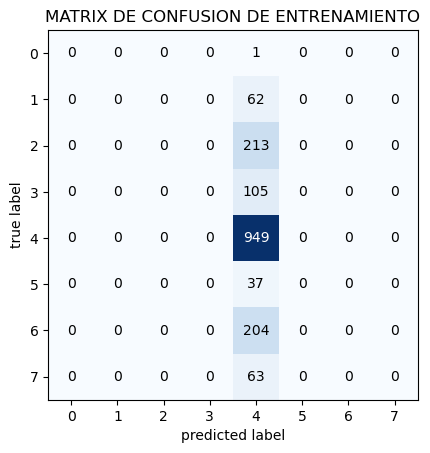

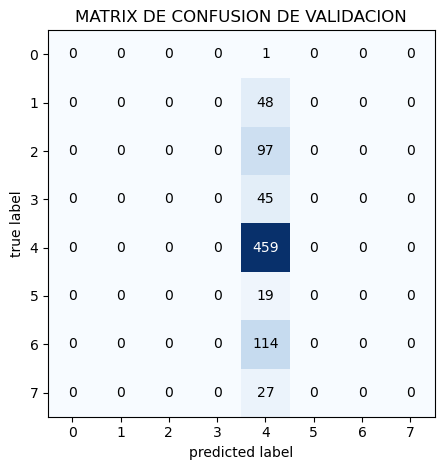

In [120]:
##############################################################################################################################
#np.argmax recibe las predicciones y el axis 
y_salida = np.argmax(test_predictions, axis=1)
#y entrada recibe las clases de test_generator
y_entrada = generador_test.classes

#np.argmax recibe las predicciones y el axis 
x_salida = np.argmax(train_predictions, axis=1)
#X_entrada recibe las clases de train_generator
x_entrada = generador_train.classes

#Matrices de confusion de Validacion y de Entrenamiento
matrix_test=confusion_matrix(y_entrada, y_salida)
matrix_train=confusion_matrix(x_entrada, x_salida)

#Grafico de la matrix de confusion de entrenamiento
plot_confusion_matrix(matrix_train)
plt.title('MATRIX DE CONFUSION DE ENTRENAMIENTO')

#Grafico de la matrix de confusion de entrenamient
plot_confusion_matrix(matrix_test)
plt.title('MATRIX DE CONFUSION DE VALIDACION')
plt.tight_layout()
print("#################################################################################################################")



#################################################################################################################


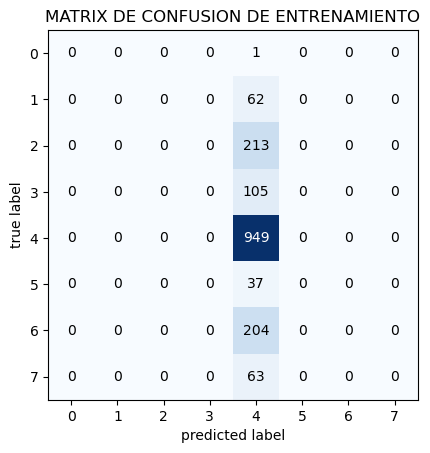

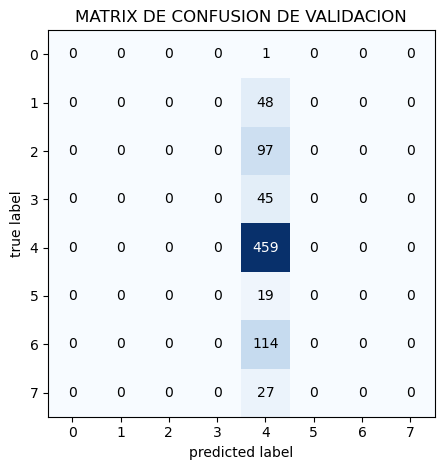

In [121]:

#Matrices de confusion de Validacion y de Entrenamiento
matrix_test=confusion_matrix(y_entrada, y_salida)
matrix_train=confusion_matrix(x_entrada, x_salida)

#Grafico de la matrix de confusion de entrenamiento
plot_confusion_matrix(matrix_train)
plt.title('MATRIX DE CONFUSION DE ENTRENAMIENTO')

#Grafico de la matrix de confusion de entrenamient
plot_confusion_matrix(matrix_test)
plt.title('MATRIX DE CONFUSION DE VALIDACION')
plt.tight_layout()
print("#################################################################################################################")


In [122]:
print("Testing Set TEST: ")
print(classification_report(y_entrada, y_salida, digits=2 ))
print("Testing Set TRAIN: ")
print(classification_report(x_entrada, x_salida, digits=2 ))
print("###########################################")

Testing Set TEST: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        45
           4       0.57      1.00      0.72       459
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00        27

    accuracy                           0.57       810
   macro avg       0.07      0.12      0.09       810
weighted avg       0.32      0.57      0.41       810

Testing Set TRAIN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00       213
           3       0.00      0.00      0.00       105
           4       0.58      1.00      

C:\Users\ESPOIR\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ESPOIR\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ESPOIR\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [123]:
image_path = 'C:/Users/ESPOIR/Documents/Proyecto_Final_Tr_Datos/clase6.png'
print(image_path)

image = tf.keras.preprocessing.image.load_img(image_path).resize([pixeles_alto,pixeles_ancho])
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = modelo_imagenes.predict(input_arr)
score = tf.nn.softmax(predictions[0])

print(" {} con un {:.2f}% de exatitud".format(class_names[np.argmax(score)],100 * np.max(score)))

C:/Users/ESPOIR/Documents/Proyecto_Final_Tr_Datos/clase6.png
1/1 [==============================] - 0s 80ms/step
 CLASS_05 con un 100.00% de exatitud
